<a href="https://colab.research.google.com/github/pachterlab/CBP_2021/blob/main/notebooks/VMHNeurons/kimetal_tenx_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import os


from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
	url = 'https://api.datacite.org/dois/'+doi+'/media'
	r = requests.get(url).json()
	netcdf_url = r['data'][0]['attributes']['url']
	r = requests.get(netcdf_url,stream=True)
	#Set file name
	fname = doi.split('/')[-1]+ext
	#Download file with progress bar
	if r.status_code == 403:
		print("File Unavailable")
	if 'content-length' not in r.headers:
		print("Did not get file")
	else:
		with open(fname, 'wb') as f:
			total_length = int(r.headers.get('content-length'))
			pbar = tnrange(int(total_length/1024), unit="B")
			for chunk in r.iter_content(chunk_size=1024):
				if chunk:
					pbar.update()
					f.write(chunk)
		return fname


#10x VMH data
#metadata.csv
download_file('10.22002/D1.2065','.gz')

#tenx.mtx (log counts)
download_file('10.22002/D1.2072','.gz')

#10X raw Count Matrix
download_file('10.22002/D1.2073','.gz')

#var.csv
download_file('10.22002/D1.2066','.gz')



os.system("gunzip *.gz")

os.system("mv D1.2065 metadata.csv")
os.system("mv D1.2072 tenx.mtx")
os.system("mv D1.2073 tenxCount.mtx")
os.system("mv D1.2066 tenx_var.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/940 [00:00<?, ?B/s]

  0%|          | 0/104912 [00:00<?, ?B/s]

  0%|          | 0/14752 [00:00<?, ?B/s]

  0%|          | 0/12 [00:00<?, ?B/s]

0

In [20]:
%cd /content

/content


In [21]:
!git clone https://github.com/hhcho/densvis.git

Cloning into 'densvis'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 145 (delta 78), reused 95 (delta 38), pack-reused 0
Receiving objects: 100% (145/145), 412.94 KiB | 4.39 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [22]:
%cd /content/densvis/densne/

/content/densvis/densne


In [23]:
!g++ sptree.cpp densne.cpp densne_main.cpp -o den_sne -O2
import densne

densne.cpp: In function ‘bool DENSNE::load_data(double**, int*, int*, int*, double*, double*, int*, int*, double*, double*, bool*, double**)’:
densne.cpp:961:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(n, sizeof(int), 1, h);                                            // number of datapoints
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:962:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(d, sizeof(int), 1, h);                                            // original dimensionality
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:963:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(theta, sizeof(double), 1, h);                                        // gradient accuracy
   ~~~~~^~~~~~~~~~

In [24]:

%cd /content/

/content


In [2]:
!git clone https://github.com/pachterlab/CBP_2021.git

Cloning into 'CBP_2021'...
remote: Enumerating objects: 579, done.
remote: Counting objects: 100% (579/579), done.
remote: Compressing objects: 100% (533/533), done.
remote: Total 579 (delta 354), reused 86 (delta 25), pack-reused 0
Receiving objects: 100% (579/579), 83.75 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (354/354), done.


In [3]:
!pip3 install --quiet torch
!pip3 install --quiet anndata
!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn
!pip3 install --quiet torchsummary
!pip install --quiet scanpy==1.6.0
!pip3 install --quiet umap-learn
!pip3 install --quiet scvi-tools

     |████████████████████████████████| 127 kB 5.2 MB/s 
     |████████████████████████████████| 7.7 MB 5.3 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 1.1 MB 36.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 217 kB 5.2 MB/s 
     |████████████████████████████████| 678 kB 35.7 MB/s 
     |████████████████████████████████| 242 kB 54.5 MB/s 
     |████████████████████████████████| 813 kB 38.9 MB/s 
     |████████████████████████████████| 211 kB 51.5 MB/s 
     |████████████████████████████████| 829 kB 43.7 MB/s 
     |████████████████████████████████| 123 kB 50.9 MB/s 
     |████████████████████████████████| 282 kB 46.2 MB/s 
     |████████████████████████████████| 636 kB 51.6 MB/s 
     |████████████████████████████████| 1.3 MB 38.2 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 142 kB 55.9 MB/s 
     |█████████████████

In [25]:
%cd /content/CBP_2021/scripts

/content/CBP_2021/scripts


## **Install Packages**

In [26]:
import anndata 
import pandas as pd
import numpy as np
from MCML import MCML #Now has continuous label addition
from Picasso import Picasso
import tools as tl
import random
import scvi
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import torch
import time
import scanpy as sc
import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
sns.set_style('white')

## **Import Data**

In [6]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '../..'

pcs = 50
n_latent = 50

In [7]:
count_mat = sio.mmread(data_path+'/tenx.mtx')
count_mat.shape

(41580, 1999)

In [ ]:
rawcount_mat = sio.mmread(data_path+'/tenxCount.mtx')
rawcount_mat.shape

(41580, 1999)

In [8]:
#Center and scale log-normalized data
scaled_mat = scale(count_mat)

In [9]:
meta = pd.read_csv(data_path+'/metadata.csv',index_col = 0)
meta.head()

,sample_name,cell_barcode,cluster_color,cluster,cluster_id,cell_types,sex_label,batch_indices,cell_counts,n_genes,percent_mito,pass_count_filter,pass_mito_filter
0,10x_VMH_Female_Control_1,4_AAACCTGAGCGCCTCA,#9162FF,Nr5a1_4,24.0,undefined,F,0,1427.0,926,13.594954,True,False
1,10x_VMH_Female_Control_1,4_AAACCTGCACAGTCGC,#96FF2E,Tsix_Esr1_1,3.0,undefined,F,0,4508.0,2310,9.272405,True,False
2,10x_VMH_Female_Control_1,4_AAACCTGCAGATTGCT,#66ABC2,Dlk1_3,16.0,undefined,F,0,3447.0,1995,5.483029,True,False
3,10x_VMH_Female_Control_1,4_AAACCTGCATACTCTT,#96FF2E,Tsix_Esr1_1,3.0,undefined,F,0,7004.0,3286,4.483152,True,True
4,10x_VMH_Female_Control_1,4_AAACCTGGTCCGTTAA,#24EFCD,Scgn,20.0,undefined,F,0,2490.0,1492,9.277108,True,False


In [10]:
clusters = np.unique(meta['cluster'].values)
map_dict = {}
for i, c in enumerate(clusters):
  map_dict[c] = i
new_labs = [map_dict[c] for c in meta['cluster'].values]

In [11]:
adata = anndata.AnnData(count_mat, obs = meta)
adata.X = np.nan_to_num(adata.X)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
adata2 = anndata.AnnData(rawcount_mat, obs = meta)
adata2.X = np.nan_to_num(adata2.X)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [12]:
def knn_infer(embd_space, labeled_idx, labeled_lab, unlabeled_idx,n_neighbors=50):
	"""
	Predicts the labels of unlabeled data in the embedded space with KNN.
	Parameters
	----------
	embd_space : ndarray (n_samples, embedding_dim)
		Each sample is described by the features in the embedded space.
		Contains all samples, both labeled and unlabeled.
	labeled_idx : list
		Indices of the labeled samples (used for training the classifier).
	labeled_lab : ndarray (n_labeled_samples)
		Labels of the labeled samples.
	unlabeled_idx : list
		Indices of the unlabeled samples.
	Returns
	-------
	pred_lab : ndarray (n_unlabeled_samples)
		Inferred labels of the unlabeled samples.
	"""

	# obtain labeled data and unlabled data from indices
	labeled_samp = embd_space[labeled_idx, :]
	unlabeled_samp = embd_space[unlabeled_idx, :]

	from sklearn.neighbors import KNeighborsClassifier

	knn = KNeighborsClassifier(n_neighbors=n_neighbors)
	knn.fit(labeled_samp, labeled_lab)

	pred_lab = knn.predict(unlabeled_samp)
	return pred_lab


In [13]:
def getJac(orig_indices,latents, latentLab, n_neighbors=30):
  emb = []

  xs = []

  ys = []

  knnDF = pd.DataFrame()

  for p in range(len(latents)):
    i = latents[p]
    l = latentLab[p]

    ind = tl.getNeighbors(i, n_neigh = n_neighbors,p=1)

    x = tl.getJaccard(orig_indices,ind)

    xs += x
    #ys += list(y)

    emb += [l]*len(x)

    print(l)

    print(np.mean(tl.getJaccard(orig_indices,ind)))



  knnDF['x'] = xs
  #knnDF['y'] = ys
  knnDF['latent'] = emb

  return knnDF

### **Prediction Accuracy for Cell Type Labels Across Benchmarks**
Tests accuracy on sex labels as well


Set up metadata for MCML

In [ ]:
lab1 = list(meta.cluster)
lab2 = list(meta.sex_label)
# lab3 = list(meta.medical_cond_label)
lab4 = list(meta.cluster)

allLabs = np.array([lab1])
allLabs2 = np.array([lab1,lab2])

nanLabs = np.array([[np.nan]*len(lab1)])

#Shuffled labels for over-fitting check
shuff_lab1 = random.sample(lab1, len(lab1))  
shuff_lab2 = random.sample(lab2, len(lab2))  
shuff_allLabs = np.array([shuff_lab1,shuff_lab2])

clus_colors = list(pd.unique(meta.cluster_color))

sex_colors = ['#abacb7','#F8C471']

First test 2D space predictions (t-SNE, UMAP, UMAP-Supervised)

In [ ]:
ndims = 2
acc_score_2D = []

for i in range(3):
  reducer = umap.UMAP(n_components = ndims)
  tsne = TSNE(n_components = ndims) 


  tsvd = TruncatedSVD(n_components=pcs)
  x_pca = tsvd.fit_transform(scaled_mat)

  pcaUMAP = reducer.fit_transform(x_pca)
  pcaTSNE = tsne.fit_transform(x_pca)

  #Partially labeled UMAP

  labels = np.array([lab4]).copy().astype(np.int8)
  train_inds = np.random.choice(len(scaled_mat), size = int(0.7*len(scaled_mat)),replace=False) #0.7 for training fraction
  #Set 30% to no label (nan)
  unlab_inds = [i for i in range(len(adata)) if i not in train_inds]
  labels[:, unlab_inds] = -1

  pcaUMAPLab = reducer.fit_transform(x_pca,y=labels[0])

  preds = knn_infer(pcaUMAPLab, train_inds, adata.obs.cluster_id.values[train_inds], unlab_inds)
  acc = accuracy_score(adata.obs.cluster_id.values[unlab_inds], preds)
  acc_score_2D.append(acc)



  preds = knn_infer(pcaUMAP, train_inds, adata.obs.cluster_id.values[train_inds], unlab_inds)
  acc = accuracy_score(adata.obs.cluster_id.values[unlab_inds], preds)
  acc_score_2D.append(acc)

  preds = knn_infer(pcaTSNE, train_inds, adata.obs.cluster_id.values[train_inds], unlab_inds)
  acc = accuracy_score(adata.obs.cluster_id.values[unlab_inds], preds)
  acc_score_2D.append(acc)

In [ ]:
print(acc_score_2D)

[0.7648897795591182, 0.6691783567134268, 0.7527855711422846, 0.7600801603206413, 0.6730260521042084, 0.7574348697394789, 0.7656112224448898, 0.6816032064128257, 0.7504609218436874]


In [ ]:
# LDVAE accuracy scores
from tqdm import tqdm #Need to intialize to stop tqdm errors
tqdm(disable=True, total=0)

scvi.data.setup_anndata(adata2, labels_key='cluster_id')
acc_score = []
acc_score2 = []
for i in range(3): #3
  vae = scvi.model.LinearSCVI(adata2,n_latent=n_latent)
  vae.train(train_size = 0.7) #train_size = 0.7
  latent_ldvae = vae.get_latent_representation()
  lab_idx = vae.train_indices
  unlabeled_idx = []
  for i in range(len(adata2)):
    if i not in lab_idx:
      unlabeled_idx.append(i)
  preds = knn_infer(np.array(latent_ldvae), list(lab_idx), adata2.obs.cluster_id.values[lab_idx], unlabeled_idx)
  acc = accuracy_score(adata2.obs.cluster_id.values[unlabeled_idx], preds)
  acc_score.append(acc)

  preds2 = knn_infer(np.array(latent_ldvae), list(lab_idx), adata2.obs.sex_label.values[lab_idx], unlabeled_idx)
  acc2 = accuracy_score(adata2.obs.sex_label.values[unlabeled_idx], preds2)
  acc_score2.append(acc2)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     Using labels from adata.obs["cluster_id"]                                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 41580 cells, 1999 vars, 1 batches,
         30 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0     
         extra continuous covariates.                                                        
INFO     Please do not further modify adata until model is trained.                          


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 192/192: 100%|██████████| 192/192 [10:17<00:00,  3.21s/it, loss=665, v_num=1]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 192/192: 100%|██████████| 192/192 [10:17<00:00,  3.21s/it, loss=658, v_num=1]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 192/192: 100%|██████████| 192/192 [10:22<00:00,  3.24s/it, loss=662, v_num=1]


In [ ]:
acc_score

[0.7932499599166266, 0.7912457912457912, 0.789642456309123]

In [ ]:
# acc_score

[0.6831810165143498, 0.6818983485650152, 0.6817380150713485]

In [ ]:
# SCANVI accuracy scores
scvi.data.setup_anndata(adata2, labels_key='cluster_id')
acc_score_scanvi = []
acc_score_scanvi2 = []
for i in range(3):
  vae = scvi.model.SCANVI(adata2, np.nan,n_latent=n_latent)
  vae.train(train_size = 0.7)
  latent_scanvi = vae.get_latent_representation()
  lab_idx = vae.train_indices
  unlabeled_idx = []
  for i in range(len(adata2)):
    if i not in lab_idx:
      unlabeled_idx.append(i)
  preds = knn_infer(np.array(latent_scanvi), list(lab_idx), adata2.obs.cluster_id.values[lab_idx], unlabeled_idx)
  acc = accuracy_score(adata2.obs.cluster_id.values[unlabeled_idx], preds)
  acc_score_scanvi.append(acc)

  preds2 = knn_infer(np.array(latent_scanvi), list(lab_idx), adata2.obs.sex_label.values[lab_idx], unlabeled_idx)
  acc2 = accuracy_score(adata2.obs.sex_label.values[unlabeled_idx], preds2)
  acc_score_scanvi2.append(acc2)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     Using labels from adata.obs["cluster_id"]                                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 41580 cells, 1999 vars, 1 batches,
         30 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0     
         extra continuous covariates.                                                        
INFO     Please do not further modify adata until model is trained.                          
INFO     Training for 192 epochs.                                                            


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 192/192: 100%|██████████| 192/192 [24:43<00:00,  7.73s/it, loss=794, v_num=1]
INFO     Training for 192 epochs.                                                            


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 192/192: 100%|██████████| 192/192 [23:53<00:00,  7.47s/it, loss=789, v_num=1]
INFO     Training for 192 epochs.                                                            


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 192/192: 100%|██████████| 192/192 [23:55<00:00,  7.48s/it, loss=788, v_num=1]


In [ ]:
print(acc_score_scanvi)
print(acc_score_scanvi2)

[0.7910854577521245, 0.7926887926887927, 0.7926887926887927]
[0.9275292608625942, 0.9238415905082572, 0.9275292608625942]


In [ ]:
# print(acc_score_scanvi)
# print(acc_score_scanvi2)

[0.7808241141574475, 0.783629950296617, 0.7790604457271124]
[0.9048420715087382, 0.8896103896103896, 0.9135000801667469]


Check train/test overfitting (with cell type labels)

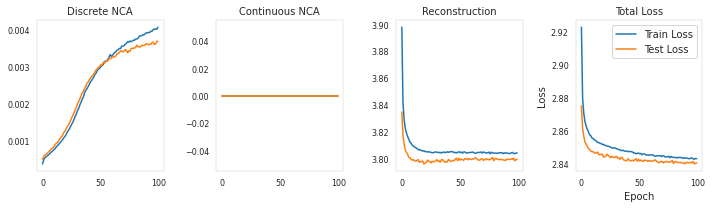

In [ ]:
# nca.fit(scaled_mat,labels,fracNCA = 0.25, silent = True,ret_loss = True) Parameters used for prediction
nca = MCML(n_latent = n_latent, epochs = 100)

lossesTrain, lossesTest = nca.trainTest(scaled_mat,np.array([lab1]), fracNCA = 0.25, silent = True)
nca.plotLosses(figsize=(10,3),fname='tenxTrainTest.pdf',axisFontSize=10,tickFontSize=8)

In [ ]:
# Reconstruction loss only
acc_scoreR = []
acc_scoreR2 = []

for i in range(3):
  ncaR = MCML(n_latent = n_latent, epochs = 100)
  labels = np.array([lab1])
  train_inds = np.random.choice(len(scaled_mat), size = int(0.7*len(scaled_mat)),replace=False)
  unlab_inds = [i for i in range(len(adata)) if i not in train_inds]
  labels[:, unlab_inds] = np.nan
  
  lossesR, latentR = ncaR.fit(scaled_mat,nanLabs,fracNCA = 0, silent = True,ret_loss = True)
  toc = time.perf_counter()
  unlabeled_idx = []
  for i in range(len(adata)):
      if i not in train_inds:
          unlabeled_idx.append(i)
  preds = knn_infer(latentR, train_inds, adata.obs.cluster.values[train_inds], unlabeled_idx)
  acc = accuracy_score(adata.obs.cluster.values[unlabeled_idx], preds)
  acc_scoreR.append(acc)

  preds2 = knn_infer(latentR, train_inds, adata.obs.sex_label.values[train_inds], unlabeled_idx)
  acc2 = accuracy_score(adata.obs.sex_label.values[unlabeled_idx], preds2)
  acc_scoreR2.append(acc2)
  # print(f"nnNCA fit in {toc - tic:0.4f} seconds")

In [ ]:
print(acc_scoreR)
print(acc_scoreR2)


[0.8298997995991984, 0.8358316633266533, 0.8317434869739478]
[0.9102204408817636, 0.9123847695390782, 0.9093386773547094]


PCA 50D

In [ ]:

acc_scorePCA = []
acc_scorePCA2 = []

for i in range(3):

  tsvd = TruncatedSVD(n_components=pcs)
  x_pca = tsvd.fit_transform(scaled_mat)
  
  labels = np.array([lab1])
  train_inds = np.random.choice(len(scaled_mat), size = int(0.7*len(scaled_mat)),replace=False)
  unlab_inds = [i for i in range(len(adata)) if i not in train_inds]
  labels[:, unlab_inds] = np.nan
  
  unlabeled_idx = []
  for i in range(len(adata)):
      if i not in train_inds:
          unlabeled_idx.append(i)

  preds = knn_infer(x_pca, train_inds, adata.obs.cluster.values[train_inds], unlabeled_idx)
  acc = accuracy_score(adata.obs.cluster.values[unlabeled_idx], preds)
  acc_scorePCA.append(acc)

  preds2 = knn_infer(x_pca, train_inds, adata.obs.sex_label.values[train_inds], unlabeled_idx)
  acc2 = accuracy_score(adata.obs.sex_label.values[unlabeled_idx], preds2)
  acc_scorePCA2.append(acc2)
  # print(f"nnNCA fit in {toc - tic:0.4f} seconds")

In [ ]:
print(acc_scorePCA)
print(acc_scorePCA2)

[0.816192384769539, 0.8143486973947895, 0.8129058116232465]
[0.9044488977955912, 0.9079759519038076, 0.9068537074148296]


NCA Below

In [ ]:
# NCA loss only
acc_scoreNCA = []
acc_scoreNCA2 = []
acc_scoreNCA3 = []

for i in range(1): #3
  nca = MCML(n_latent = n_latent, epochs = 100)
  ncaR2 = MCML(n_latent = n_latent, epochs = 100)

  labels = np.array([lab1]).copy()
  train_inds = np.random.choice(len(scaled_mat), size = int(0.7*len(scaled_mat)),replace=False) #0.7
  unlab_inds = [i for i in range(len(adata)) if i not in train_inds]
  labels[:, unlab_inds] = np.nan

  #2 labels
  labels2 = allLabs2.copy()
  labels2[:, unlab_inds] = np.nan

  losses, latent = nca.fit(scaled_mat,labels,fracNCA = 1, silent = True,ret_loss = True)

  losses2, latent2 = ncaR2.fit(scaled_mat,labels2,fracNCA = 1, silent = True,ret_loss = True)

  toc = time.perf_counter()
  unlabeled_idx = []
  for i in range(len(adata)):
      if i not in train_inds:
          unlabeled_idx.append(i)
  preds = knn_infer(latent, train_inds, adata.obs.cluster.values[train_inds], unlabeled_idx)
  acc = accuracy_score(adata.obs.cluster.values[unlabeled_idx], preds)
  acc_scoreNCA.append(acc)

  preds2 = knn_infer(latent2, train_inds, adata.obs.cluster.values[train_inds], unlabeled_idx)
  acc2 = accuracy_score(adata.obs.cluster.values[unlabeled_idx], preds2)
  acc_scoreNCA2.append(acc2)

  preds2 = knn_infer(latent2, train_inds, adata.obs.sex_label.values[train_inds], unlabeled_idx)
  acc2 = accuracy_score(adata.obs.sex_label.values[unlabeled_idx], preds2)
  acc_scoreNCA3.append(acc2)

  # print(f"nnNCA fit in {toc - tic:0.4f} seconds")

In [ ]:
print(acc_scoreNCA)
print(acc_scoreNCA2)
print(acc_scoreNCA3)

[0.7521442885771543]
[0.7487775551102205]
[0.872064128256513]


In [ ]:
# fracNCA = 0.3
acc_scoreBoth = []
acc_scoreBoth2 = []
acc_scoreBoth3 = []

for i in range(3): #3
  nca = MCML(n_latent = n_latent, epochs = 100)
  ncaR2 = MCML(n_latent = n_latent, epochs = 100)

  labels = np.array([lab1]).copy()
  train_inds = np.random.choice(len(scaled_mat), size = int(0.7*len(scaled_mat)),replace=False)
  unlab_inds = [i for i in range(len(adata)) if i not in train_inds]
  labels[:, unlab_inds] = np.nan

  #2 labels
  labels2 = allLabs2.copy()
  labels2[:, unlab_inds] = np.nan

  losses, latent = nca.fit(scaled_mat,labels,fracNCA = 0.25, silent = True,ret_loss = True)
  losses2, latent2 = ncaR2.fit(scaled_mat,labels2,fracNCA = 0.25, silent = True,ret_loss = True)


  toc = time.perf_counter()
  unlabeled_idx = []
  for i in range(len(adata)):
      if i not in train_inds:
          unlabeled_idx.append(i)
  preds = knn_infer(latent, train_inds, adata.obs.cluster.values[train_inds], unlabeled_idx)
  acc = accuracy_score(adata.obs.cluster.values[unlabeled_idx], preds)
  acc_scoreBoth.append(acc)

  preds2 = knn_infer(latent2, train_inds, adata.obs.cluster.values[train_inds], unlabeled_idx)
  acc2 = accuracy_score(adata.obs.cluster.values[unlabeled_idx], preds2)
  acc_scoreBoth2.append(acc2)

  preds2 = knn_infer(latent2, train_inds, adata.obs.sex_label.values[train_inds], unlabeled_idx)
  acc2 = accuracy_score(adata.obs.sex_label.values[unlabeled_idx], preds2)
  acc_scoreBoth3.append(acc2)

  # # print(f"nnNCA fit in {toc - tic:0.4f} seconds")

In [ ]:
print(acc_scoreBoth)
print(acc_scoreBoth2)
print(acc_scoreBoth3)

[0.836312625250501, 0.8432865731462926, 0.8446492985971944]
[0.8392785571142285, 0.8459318637274549, 0.8428857715430862]
[0.919438877755511, 0.919438877755511, 0.9228857715430862]


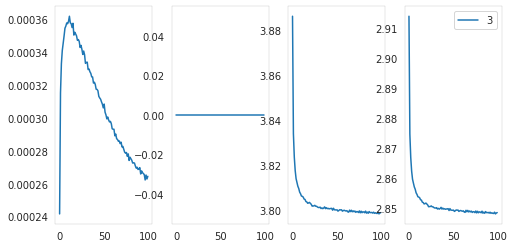

In [ ]:
fig, axs = plt.subplots(1, losses.shape[1],figsize=(8,4))
for i in range(losses.shape[1]):
  axs[i].plot(losses[:,i],label=str(i))
  
plt.legend()
plt.show()

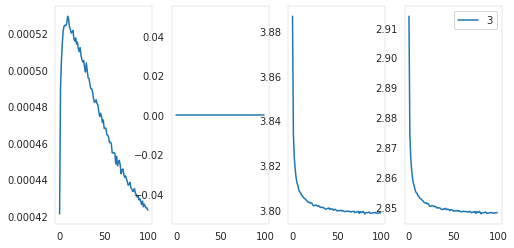

In [ ]:
fig, axs = plt.subplots(1, losses2.shape[1],figsize=(8,4))
for i in range(losses2.shape[1]):
  axs[i].plot(losses2[:,i],label=str(i))
  
plt.legend()
plt.show()

### **Save Analysis Output**

In [ ]:
vals = pd.DataFrame()

vals['Accuracy'] = acc_score + acc_score_scanvi + acc_scoreR + acc_scoreNCA + acc_scoreBoth + acc_score2 + acc_score_scanvi2 + acc_scoreR2 + acc_scoreNCA3 + acc_scoreBoth3 + acc_scoreNCA2 + acc_scoreBoth2 +
acc_scorePCA +acc_scorePCA2  #+ netAE_score + netAE_score2

In [ ]:
vals['Embed'] = ['LDVAE']*3 + ['SCANVI']*3 + ['Recon MCML']*3 + ['NCA 100% MCML']*1 + ['NCA-Recon MCML']*3 +['LDVAE']*3 + ['SCANVI']*3 + ['Recon MCML']*3 + ['NCA 100% MCML']*1 + ['NCA-Recon MCML']*3 + 
['NCA 100% MCML']*1 + ['NCA-Recon MCML']*3 + ['PCA 50D']*3 + ['PCA 50D']*3 #+ ['netAE']*2

In [ ]:
vals['Label'] = ['CellType1']*13 + ['Gender2']*13 + ['CellType2']*4 + ['CellType1']*3 + ['Gender2']*3#+  ['CellType1'] #+  ['Gender2']

In [ ]:
vals


,Accuracy,Embed,Label
0,0.683181,LDVAE,CellType1
1,0.681898,LDVAE,CellType1
2,0.681738,LDVAE,CellType1
3,0.780824,SCANVI,CellType1
4,0.783630,SCANVI,CellType1
5,0.779060,SCANVI,CellType1
6,0.829900,Recon MCML,CellType1
7,0.835832,Recon MCML,CellType1
8,0.831743,Recon MCML,CellType1
9,0.752144,NCA 100% MCML,CellType1


In [ ]:
from google.colab import files

vals.to_csv('all10XPreds.csv')
files.download('all10XPreds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **MCML Prediction Accuracy With Lower Percentages of Labeled Data**

In [ ]:
# fracNCA = 0.5 
acc_scoreBoth = []
percs = [0.7,0.6,0.5,0.4,0.3,0.2,0.1]

for p in percs:
  nca = MCML(n_latent = n_latent, epochs = 100)
  ncaR2 = MCML(n_latent = n_latent, epochs = 100)

  labels = np.array([lab1])
  train_inds = np.random.choice(len(scaled_mat), size = int((p)*len(scaled_mat)),replace=False)
  unlab_inds = [i for i in range(len(adata)) if i not in train_inds]
  labels[:, unlab_inds] = np.nan

  #2 labels
  labels2 = allLabs2
  labels2[:, unlab_inds] = np.nan

  losses, latent = nca.fit(scaled_mat,labels,fracNCA = 0.25, silent = True,ret_loss = True)



  toc = time.perf_counter()
  unlabeled_idx = []
  for i in range(len(adata)):
      if i not in train_inds:
          unlabeled_idx.append(i)
  preds = knn_infer(latent, train_inds, adata.obs.cluster.values[train_inds], unlabeled_idx)
  acc = accuracy_score(adata.obs.cluster.values[unlabeled_idx], preds)
  acc_scoreBoth.append(acc)


  # print(f"nnNCA fit in {toc - tic:0.4f} seconds")

In [ ]:
lowPercsSmartSeq = pd.DataFrame()

lowPercsSmartSeq['Accuracy'] = acc_scoreBoth
lowPercsSmartSeq['Percent'] = percs

lowPercsSmartSeq

,Accuracy,Percent
0,0.844489,0.7
1,0.836941,0.6
2,0.832660,0.5
3,0.822551,0.4
4,0.812444,0.3
5,0.801106,0.2
6,0.767597,0.1


In [ ]:
from google.colab import files

lowPercsSmartSeq.to_csv('lowPercs10XPreds.csv')
files.download('lowPercs10XPreds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Test KNN Jaccard**

In [15]:
rounds = 3

In [16]:
batch_size = 128 #scaled_mat.shape[0]#len(adata.obs_names)
#Make a (unit) circle 
#r = 1
theta = np.linspace(0, 2*np.pi, batch_size)
# #Turkey guy
# x, y = (np.sin(2**theta) - 1.7) * np.cos(theta), (np.sin(2**theta) - 1.7) * np.sin(theta)

# #Butterfly r = 4*cos(4cosθ))
# x, y = (2*np.cos(4*np.cos(theta))) * np.cos(theta), (2*np.cos(4*np.cos(theta))) * np.sin(theta)

# # Spiral
#x, y = (1/2)*theta * np.cos(theta), (1/2)*theta * np.sin(theta)

# #Quasi-rose
x, y = (4 + np.cos(6*theta)) * np.cos(theta), (4 + np.cos(6*theta)) * np.sin(theta)


#Make array input for dimension of shape 
coords = np.array([list(x),list(y)])

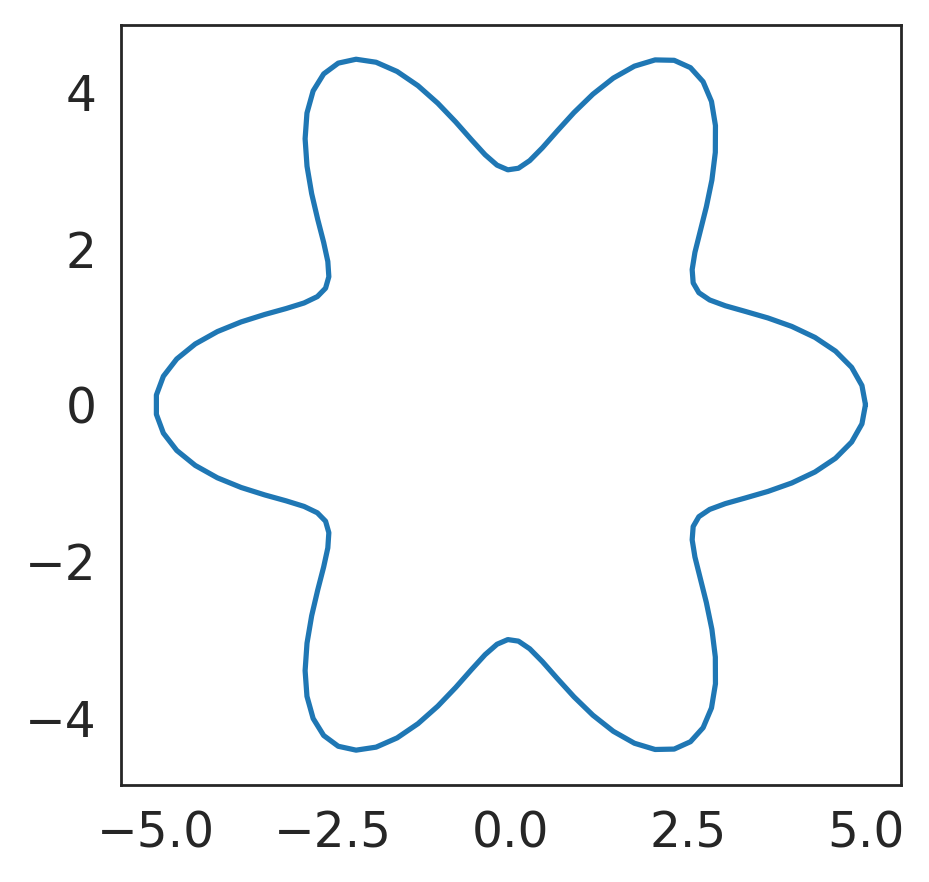

In [ ]:
plt.plot(x,y)

In [17]:
#Ex utero 
fl = []
flLab = []
flType = []

for i in range(rounds):
  nca = Picasso(n_latent = 2, epochs = 500, batch_size = batch_size)
  lossesB, latentB = nca.fit(scaled_mat,coords, frac = .3,silent=True,ret_loss=True)  #.06 for ex utero

  fl += [latentB]
  flLab += ['Flower']
  flType += ['MCML 2D']





Save KNN Jaccard Dists

In [ ]:
orig_indices = tl.getNeighbors(count_mat, n_neigh = 30,p=1)

In [ ]:
df = getJac(orig_indices,fl, flLab, 30)
df.to_csv('tenxPicFlAmb.csv')

In [ ]:
from google.colab import files
files.download("tenxPicFlAmb.csv")

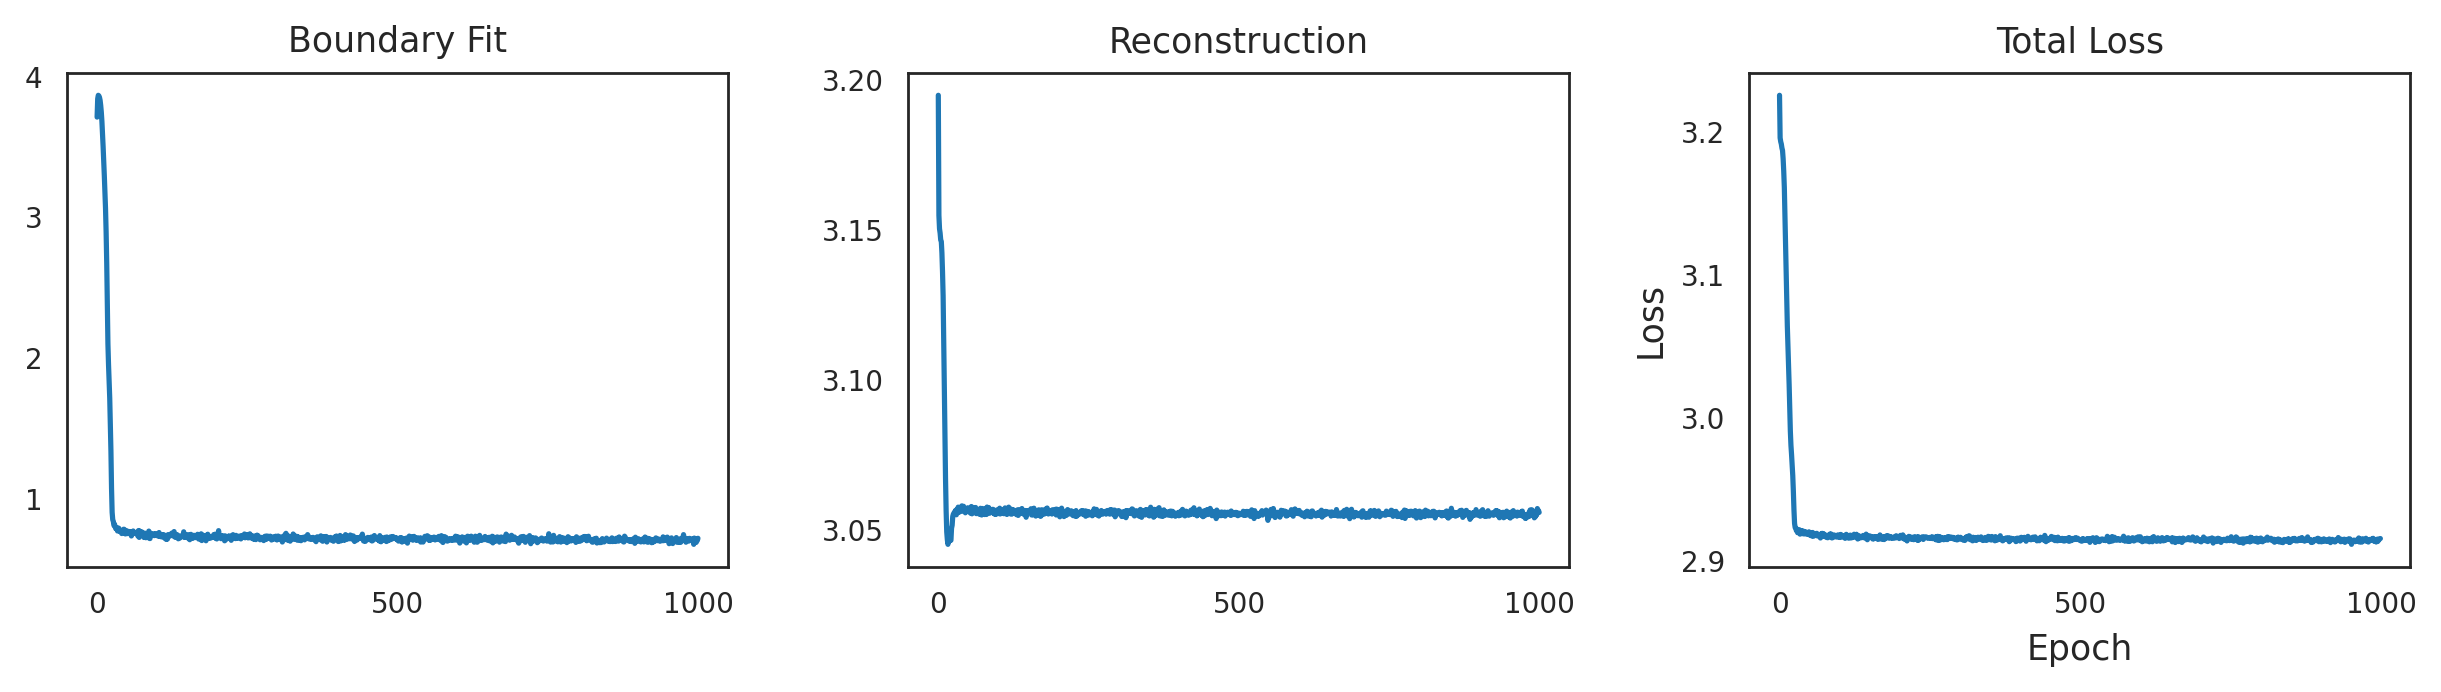

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

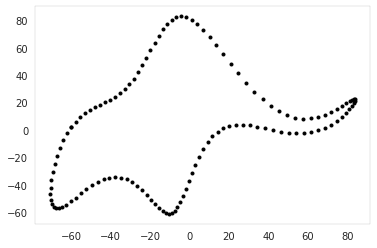

In [ ]:
# elephant parameters
batch_size = 128 #scaled_mat.shape[0]#3850 # 50

p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    # x = np.append(fourier(t,Cx), [-p5.imag]) #[-p5.imag]
    # y = np.append(fourier(t,Cy), [p5.imag]) #[p5.imag]
    x = fourier(t,Cx)
    y = fourier(t,Cy)

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,batch_size), p1, p2, p3, p4, p5)

#Make array input for dimension of shape 

y = y#0.04*y #.025  .025    .025
x = x#0.02*x #.015   .02     .015
# y = 0.02*y  
# x = 0.01*x

coords = np.array([list(y),list(-x)])

plt.plot(y,-x,'.',c='black')
plt.show()


In [ ]:
#Test with task assignment in-utero
el = []
elLab = []
elType = []

for i in range(rounds):
  nca = Picasso(n_latent = 2, epochs = 500, batch_size = batch_size)
  lossesEl, latentEl = nca.fit(scaled_mat,coords, frac = 0.3,silent=True,ret_loss=True)

  el += [latentEl]
  elLab += ['Elephant']
  elType += ['MCML 2D']




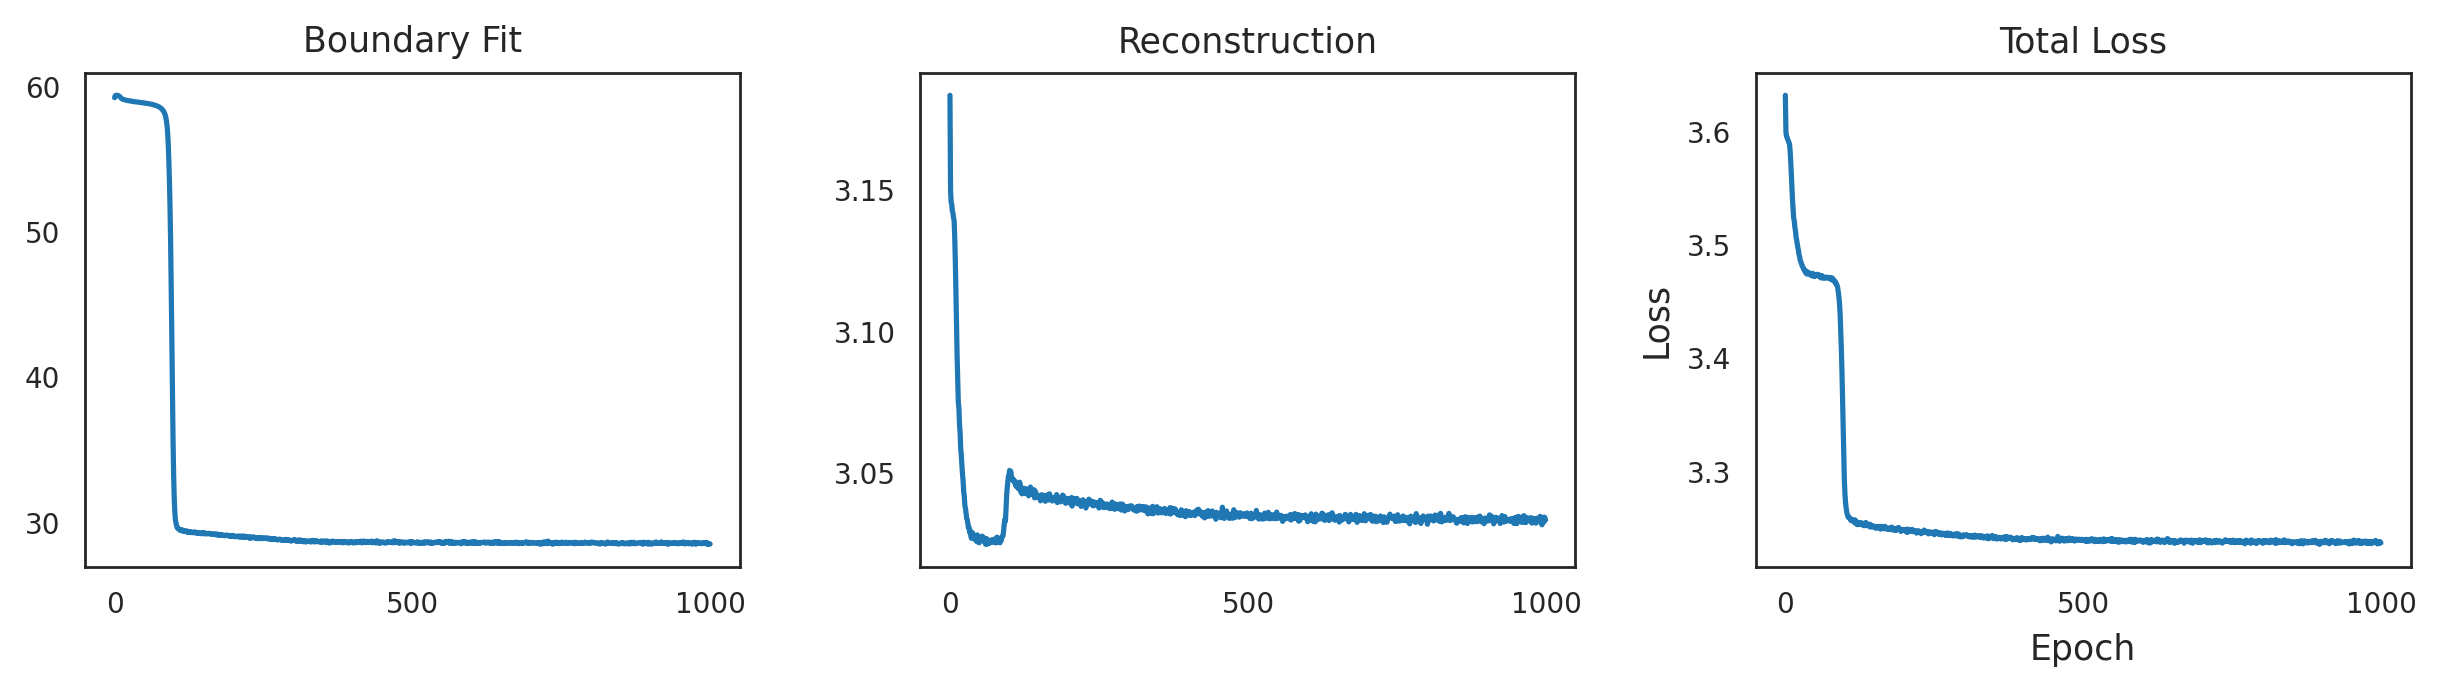

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

Save KNN Jaccard Dists

In [ ]:
orig_indices = tl.getNeighbors(count_mat, n_neigh = 30,p=1)

In [ ]:
df = getJac(orig_indices,el, elLab, 30)
df.to_csv('tenxPicElAmb.csv')

In [ ]:
from google.colab import files
files.download("tenxPicElAmb.csv")